In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
from matplotlib import pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [15]:
X # This is the sepal length and sepal width data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [17]:
sepal_length = X[:,:1] # by this way we can find the saperate column of data like this is the data for sepal length
sepal_width = X[:,1:]

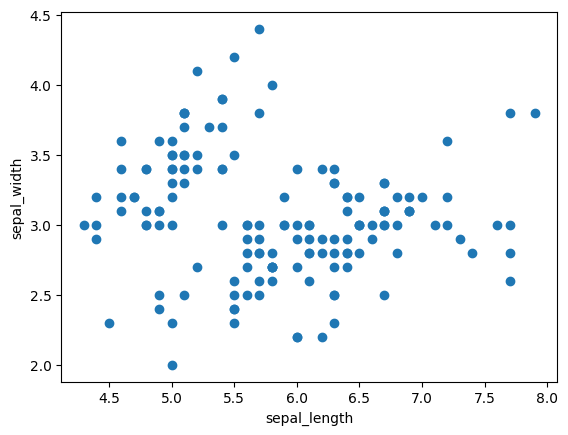

In [19]:
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.scatter(sepal_length,sepal_width)

In [20]:
k_range = range(1,20)
sum_square_err = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(sepal_length,sepal_width)
    sum_square_err.append(km.inertia_)

In [21]:
sum_square_err

[102.16833333333335,
 30.91449379607985,
 15.816622672964716,
 8.257769230769235,
 5.568189440993789,
 3.7133214578214577,
 2.6475299290546097,
 1.9854381263616545,
 1.523943672014259,
 1.095607360670021,
 0.9349052131443438,
 0.7844949567340864,
 0.6970822583213883,
 0.5436947496947494,
 0.4863534798534788,
 0.41218115218115275,
 0.3739647019647021,
 0.3174897186147198,
 0.2982525807525817]

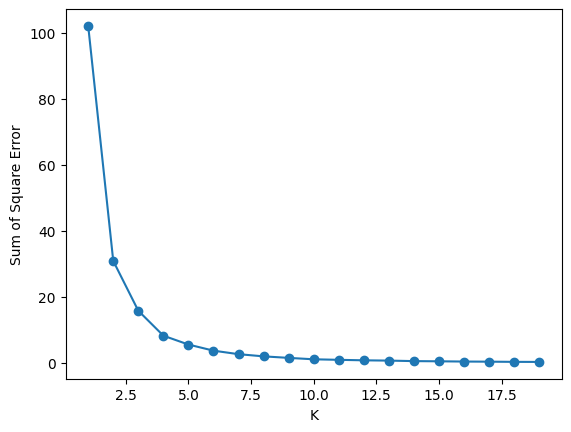

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.scatter(k_range,sum_square_err)
plt.plot(k_range,sum_square_err)

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(sepal_length)
sepal_length = scaler.transform(sepal_length)

scaler.fit(sepal_width)
sepal_width = scaler.transform(sepal_width)

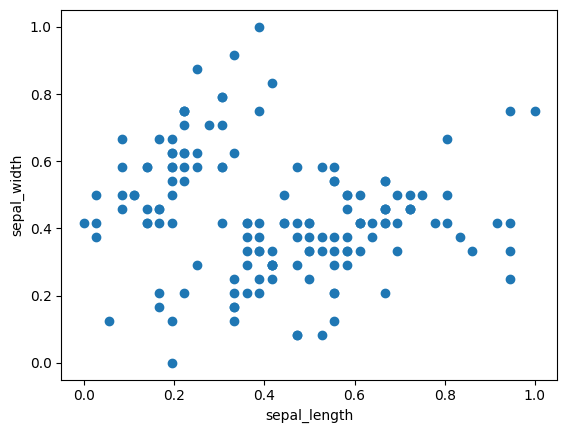

In [27]:
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.scatter(sepal_length,sepal_width)

In [28]:
k_range = range(1,20)
sum_square_err = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(sepal_length,sepal_width)
    sum_square_err.append(km.inertia_)

In [29]:
sum_square_err

[7.883359053497943,
 2.385377607722209,
 1.2204184161238205,
 0.6371735517568852,
 0.4295470809725194,
 0.280570688064272,
 0.2042847167480407,
 0.15846627231998023,
 0.11577578704250242,
 0.08453760498997073,
 0.0732627460435431,
 0.06400124607361447,
 0.0524159996382217,
 0.04269834674927267,
 0.03719300247078022,
 0.031178299581077387,
 0.0280756666173333,
 0.02519869533758424,
 0.022374706055261664]

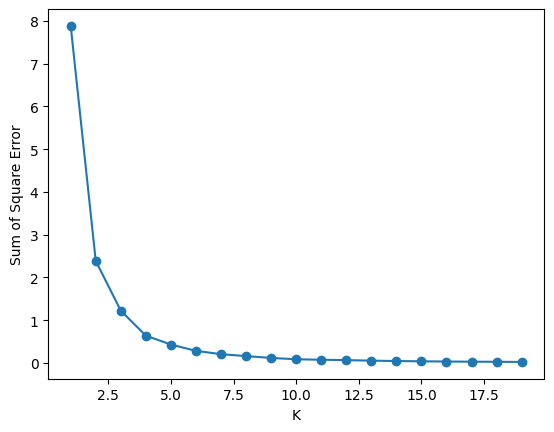

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.scatter(k_range,sum_square_err)
plt.plot(k_range,sum_square_err)

In [59]:
sepal_length = np.reshape(sepal_length,-1)
sepal_width = np.reshape(sepal_width,-1)

In [61]:
df = pd.DataFrame({'s_length':sepal_length,'s_width':sepal_width,'cluster':y_predicted})

In [62]:
df

,s_length,s_width,cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,0
146,0.555556,0.208333,0
147,0.611111,0.416667,0
148,0.527778,0.583333,0


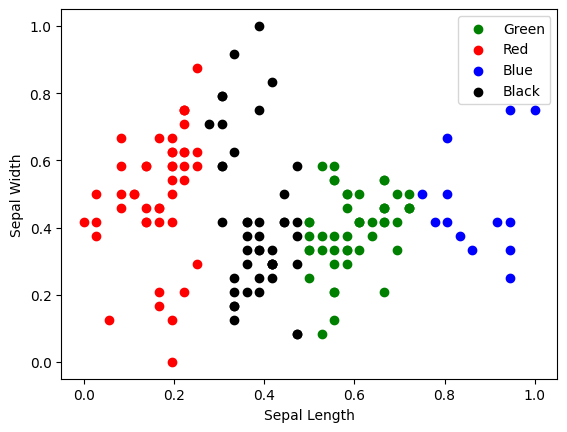

In [65]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1['s_length'],df1['s_width'],color='green')
plt.scatter(df2['s_length'],df2['s_width'],color='red')
plt.scatter(df3['s_length'],df3['s_width'],color='blue')
plt.scatter(df4['s_length'],df4['s_width'],color='black')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*")

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(['Green','Red','Blue','Black'])